https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Logistic%20Regression%20balanced.ipynb

# Building A Logistic Regression in Python, Step by Step

**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In **logistic regression**, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the **logistic regression** model *predicts P(Y=1)* as a function of X.


## Logistic regression assumptions
-   Binary logistic regression requires the dependent variable to be binary.
-   For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
-   Only the meaningful variables should be included.
-   The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
-   The independent variables are linearly related to the log odds.
-   Logistic regression requires quite large sample sizes.


## Glosary
-   Log Odds: Odds ratio transformed by logarithm operation
-   Odds ratio: statistic that quantifies the strength of the association between two events, A and B

In [49]:
#Pandas is a framework used to manage tables and different n-dimensional data structures.
import pandas as pd

#Numpy is a framework with math tools
import numpy as np

#Library with tools used to statistics (linear regression, classifiers, and so on)
from sklearn import preprocessing

#Tool used to plotting (very logic, isn't it?)
import matplotlib.pyplot as plt 

#TODO: get deep in this function use
plt.rc("font", size=14)

#TODO: get deep in this import
from sklearn.linear_model import LogisticRegression

#TODO: get deep in this import
from sklearn.model_selection import train_test_split

#TODO: get deep in this import
import seaborn as sns

#TODO: get deep in this set funcions use
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

This dataset was retrieved from [UCI Machine Learning repository](http://archive.ics.uci.edu/ml/index.php).

It is related to direct marketing campaigns of a Portuguese banking institution.

The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y)

In [50]:
data = pd.read_csv('./data/bank-additional-full.csv', header=0, sep=';')
data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [51]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



**Input variables**

This data has 41,118 observations and 21 features.

1.  age (numeric)

2.  job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)

3.  marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)

4.  education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)

5.  default: has credit in default? (categorical: “no”, “yes”, “unknown”)

6.  housing: has housing loan? (categorical: “no”, “yes”, “unknown”)

7.  loan: has personal loan? (categorical: “no”, “yes”, “unknown”)

8.  contact: contact communication type (categorical: “cellular”, “telephone”)

9.  month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)

10.  day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)

11.  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

12.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14.  previous: number of contacts performed before this campaign and for this client (numeric)

15.  poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)

16.  emp.var.rate: employment variation rate — (numeric)

17.  cons.price.idx: consumer price index — (numeric)

18.  cons.conf.idx: consumer confidence index — (numeric)

19.  euribor3m: euribor 3 month rate — (numeric)

20.  nr.employed: number of employees — (numeric)


**Predict variable (desired target):**

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

Let's corroborate the values inside categorical variables, only to detect any wear value.

In [52]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

def cheq_unique_values(categories: list, data: pd.DataFrame):

  for category in categories:
    print(f'The unique values in {category} are: {data[category].unique()}')

cheq_unique_values(categories=cat_vars, data=data)


The unique values in job are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
The unique values in marital are: ['married' 'single' 'divorced' 'unknown']
The unique values in education are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
The unique values in default are: ['no' 'unknown' 'yes']
The unique values in housing are: ['no' 'yes' 'unknown']
The unique values in loan are: ['no' 'yes' 'unknown']
The unique values in contact are: ['telephone' 'cellular']
The unique values in month are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
The unique values in day_of_week are: ['mon' 'tue' 'wed' 'thu' 'fri']
The unique values in poutcome are: ['nonexistent' 'failure' 'success']


After verify values, education feature looks like has many categories. Let's reduce them.

In [53]:

# data_in_cleaning = data[data['pdays']!= -1]

data_in_cleaning = data.copy()

data_in_cleaning['education']=np.where(data_in_cleaning['education'] =='basic.9y', 'Basic', data_in_cleaning['education'])
data_in_cleaning['education']=np.where(data_in_cleaning['education'] =='basic.6y', 'Basic', data_in_cleaning['education'])
data_in_cleaning['education']=np.where(data_in_cleaning['education'] =='basic.4y', 'Basic', data_in_cleaning['education'])

data_in_cleaning['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)


## Data exploration

Let's get in deepth with the data.


In [54]:
#Counting of target variable values

data_in_cleaning['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

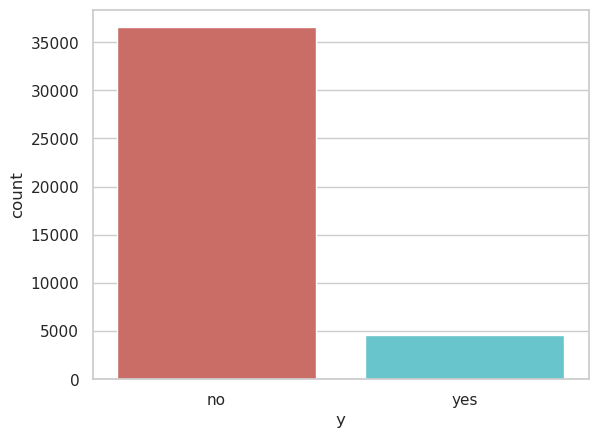

<Figure size 640x480 with 0 Axes>

In [55]:
sns.countplot(x='y', data=data_in_cleaning, palette='hls')
plt.show()

#This line is used to save plotting png's 
#plt.savefig('count_plot')

In [56]:
count_no_sub = len(data_in_cleaning[data_in_cleaning['y']=='no'])
count_sub = len(data_in_cleaning[data_in_cleaning['y']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


Subscription and no-subscription are imbalanced.

Ratio: 89:11.

In [57]:
data_in_cleaning.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


**_Observations_**:

-   The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
-   The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
-   Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [58]:
data_in_cleaning.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [59]:
data_in_cleaning.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750


In [60]:
data_in_cleaning.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509



##Visualizations

The next part corresponds to visualization and charts. Here will be a little description about each chart.

The next chart is a bar chart. As simple as that, showns frequences for each category from the target variable.

The interpretation is: given that job title can be a good predictor of the outcome variable, have light about responses distribution helps with the after modeling work.

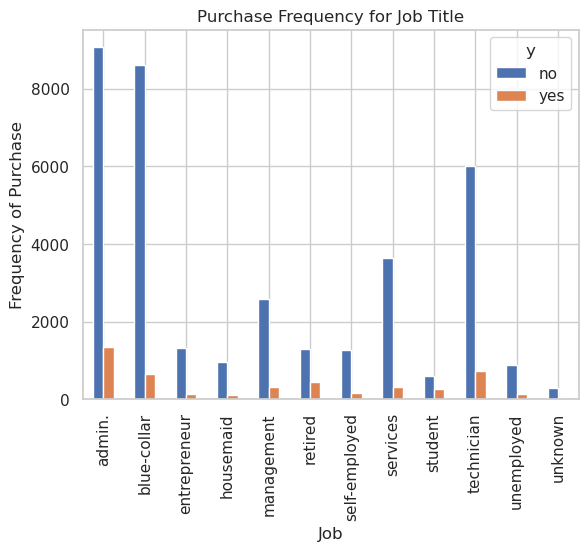

In [61]:
pd.crosstab(data_in_cleaning.job,data_in_cleaning.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

#This line is used to save plotting png's 
#plt.savefig('purchase_fre_job')

The chart here below is a stacked bar chart. 

Stacked bar chart is supposed to be used to compare total values across several categories and, at the same time, to identify which series is to “blame” for making one total bigger or perhaps smaller than another.

Stacked bar charts are designed to help you simultaneously compare totals and notice **sharp changes** at the item level that are likely to have the most influence on movements in category totals.

The main purpose of this chart is to enable a better understanding of the big picture, without much focus on details such as light changes.

The stacked bar charts not only allow us to see the category totals first, but also get a rough yet helpful understanding of the item level within each category.

[source](https://www.smashingmagazine.com/2017/03/understanding-stacked-bar-charts/)

Given the previous considerations, marital state isn't seems like a good predictor.

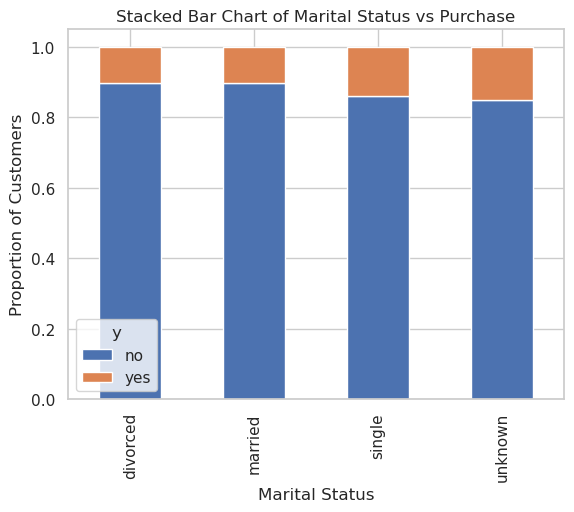

In [62]:
table=pd.crosstab(data_in_cleaning.marital,data_in_cleaning.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

#This line is used to save plotting png's 
#plt.savefig('mariral_vs_pur_stack')

On the other hand, educations seems like a good predictor.

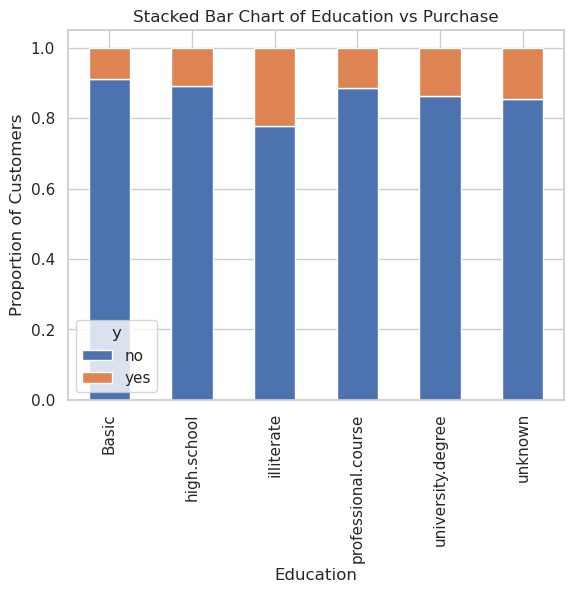

In [63]:
table=pd.crosstab(data_in_cleaning.education,data_in_cleaning.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

#This line is used to save plotting png's 
#plt.savefig('edu_vs_pur_stack')

The day of the week doesn't look as a good predictor.

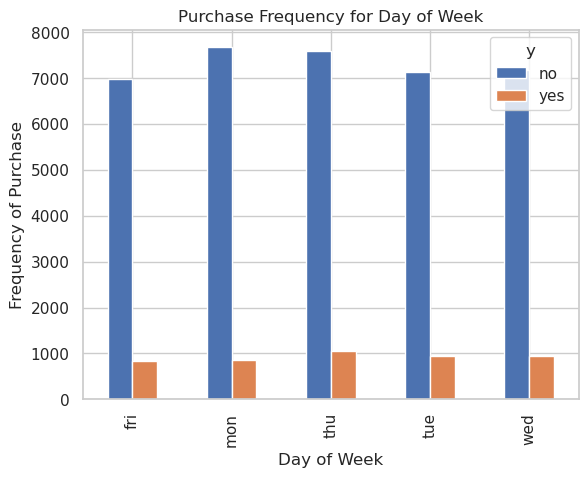

In [64]:
pd.crosstab(data_in_cleaning.day_of_week,data_in_cleaning.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

#This line is used to save plotting png's 
#plt.savefig('pur_dayofweek_bar')

Month could be a good predictor

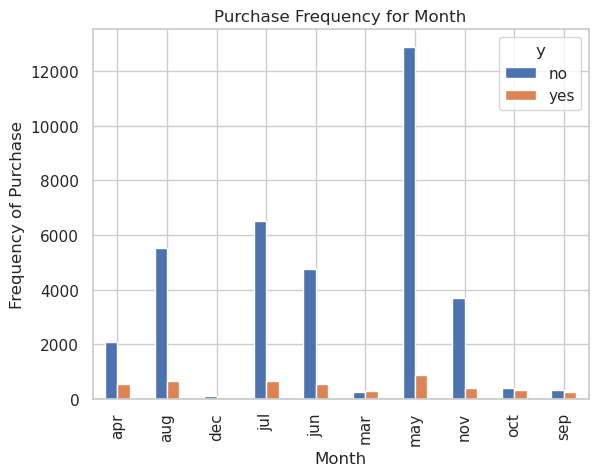

In [65]:
pd.crosstab(data_in_cleaning.month,data_in_cleaning.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

#This line is used to save plotting png's 
#plt.savefig('pur_fre_month_bar')

Most of the customers of the bank in this dataset are in the age range of 30–40.

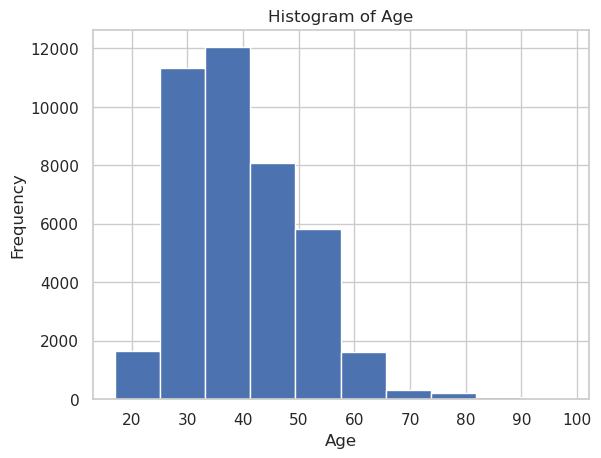

In [66]:
data_in_cleaning.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#This line is used to save plotting png's 
#plt.savefig('hist_age')

Poutcome seems to be a good predictor of the outcome variable.

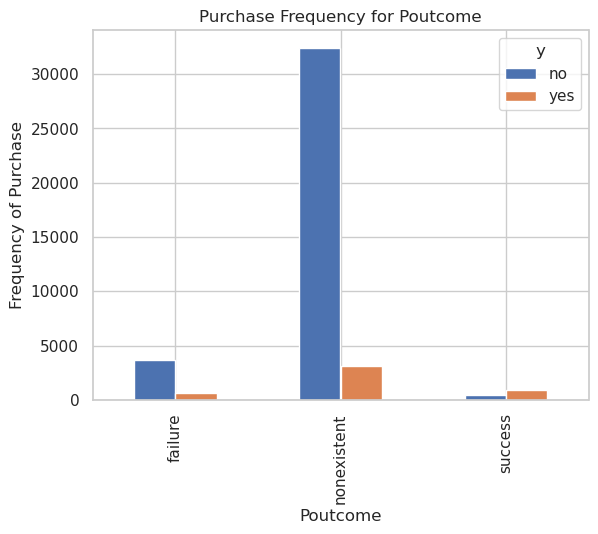

In [67]:
pd.crosstab(data_in_cleaning.poutcome,data_in_cleaning.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

#This line is used to save plotting png's 
#plt.savefig('pur_fre_pout_bar')

The code below creates new dummy variables.
what is and what does a dummy variable?

In [68]:

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_in_cleaning[var], prefix=var)
    data_in_cleaning1=data_in_cleaning.join(cat_list)
    data_in_cleaning=data_in_cleaning1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_in_cleaning_vars=data_in_cleaning.columns.values.tolist()
to_keep=[i for i in data_in_cleaning_vars if i not in cat_vars]

In [69]:
data_final=data_in_cleaning[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [70]:
data_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


Over-sampling using SMOTE
With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
We are going to implement SMOTE in Python.

In [71]:
from imblearn.over_sampling import SMOTE

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
y['y'] = y['y'].replace(['no', 'yes'], [0, 1])

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

/tmp/ipykernel_7533/3943028550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['y'] = y['y'].replace(['no', 'yes'], [0, 1])


In [72]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']=='no']))
print("Number of subscription",len(os_data_y[os_data_y['y']=='yes']))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='no'])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='yes'])/len(os_data_X))

length of oversampled data is  51158
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


In [73]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [74]:
cols = [os_data_X.columns[i] for i in range(len(os_data_X.columns)) if(rfe.support_[i])]

# cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
#       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
#       'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']


In [75]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.364556
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.474     
Dependent Variable:      y                    AIC:                  37337.9450
Date:                    2022-11-25 22:31     BIC:                  37505.9558
No. Observations:        51158                Log-Likelihood:       -18650.   
Df Model:                18                   LL-Null:              -35460.   
Df Residuals:            51139                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          8.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [76]:
cols = [value for value in cols if value not in ['marital_married', 'housing_unknown', 'housing_yes', 'loan_unknown']]

X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.367269
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.470     
Dependent Variable:      y                    AIC:                  37609.5401
Date:                    2022-11-25 22:31     BIC:                  37751.0229
No. Observations:        51158                Log-Likelihood:       -18789.   
Df Model:                15                   LL-Null:              -35460.   
Df Residuals:            51142                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          8.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [77]:
cols = [value for value in cols if value not in ['housing_no']]

X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.368451
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.468     
Dependent Variable:      y                    AIC:                  37728.3860
Date:                    2022-11-25 22:31     BIC:                  37861.0261
No. Observations:        51158                Log-Likelihood:       -18849.   
Df Model:                14                   LL-Null:              -35460.   
Df Residuals:            51143                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          8.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [79]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7614   37]
 [1296 6401]]


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      7651
           1       0.99      0.83      0.91      7697

    accuracy                           0.91     15348
   macro avg       0.92      0.91      0.91     15348
weighted avg       0.92      0.91      0.91     15348



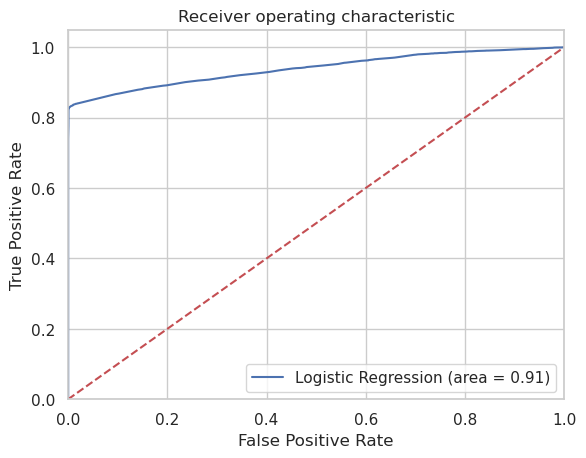

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

#This line is used to save plotting png's 
#plt.savefig('Log_ROC')

plt.show()